<a href="https://colab.research.google.com/github/preritt/Embed/blob/master/Lenet300_100Validation98p74Test98p42ProbabilityBased.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline
import tensorflow as tf

In [0]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", reshape=False)
X_train, y_train           = mnist.train.images, mnist.train.labels
X_validation, y_validation = mnist.validation.images, mnist.validation.labels
X_test, y_test             = mnist.test.images, mnist.test.labels

assert(len(X_train) == len(y_train))
assert(len(X_validation) == len(y_validation))
assert(len(X_test) == len(y_test))

print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_validation)))
print("Test Set:       {} samples".format(len(X_test)))

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.

Image Shape: (28, 28, 1)

Training Set:   55000 samples
Validation Set: 5000 samples
Test Set:       10000 samples


In [0]:
train_data = X_train.reshape(X_train.shape[0],-1)
train_label = y_train
validation_data = X_validation.reshape(X_validation.shape[0],-1)
validation_label = y_validation
test_data = X_test.reshape(X_test.shape[0],-1)
test_label = y_test

In [0]:
# clf =MLPClassifier(hidden_layer_sizes=(300,100, ), max_iter=200, alpha=1e-4,
#                     solver='adam', verbose=10, tol=1e-5, random_state=1,
#                     learning_rate_init=.1)
### acc is 98.41
clf = MLPClassifier(hidden_layer_sizes=(300,100,), max_iter=200, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)
# Test set score: 0.950119

# clf.fit(train_valid_combined, train_valid_label)
clf.fit(train_data, train_label)

Iteration 1, loss = 0.27088284
Iteration 2, loss = 0.09284897
Iteration 3, loss = 0.06362837
Iteration 4, loss = 0.04513577
Iteration 5, loss = 0.03265040
Iteration 6, loss = 0.02556718
Iteration 7, loss = 0.01983507
Iteration 8, loss = 0.01265771
Iteration 9, loss = 0.00954815
Iteration 10, loss = 0.00746641
Iteration 11, loss = 0.00487287
Iteration 12, loss = 0.00280570
Iteration 13, loss = 0.00162220
Iteration 14, loss = 0.00092841
Iteration 15, loss = 0.00073810
Iteration 16, loss = 0.00063660
Iteration 17, loss = 0.00065059
Iteration 18, loss = 0.00056893
Iteration 19, loss = 0.00052885
Iteration 20, loss = 0.00050482
Iteration 21, loss = 0.00049094
Iteration 22, loss = 0.00047780
Iteration 23, loss = 0.00046712
Iteration 24, loss = 0.00045812
Iteration 25, loss = 0.00044891
Iteration 26, loss = 0.00044162
Iteration 27, loss = 0.00043538
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(300, 100), learning_rate='constant',
       learning_rate_init=0.1, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=10, warm_start=False)

In [0]:
clf.score(train_data,train_label)

1.0

In [0]:
clf.score(validation_data,validation_label)

0.9864

In [0]:
clf.score(test_data,test_label)

0.984

# LeNet Lab
![LeNet Architecture](https://github.com/sujaybabruwad/LeNet-in-Tensorflow/blob/master/lenet.png?raw=1)
Source: Yan LeCun

In [0]:
from tensorflow.contrib.tensorboard.plugins import projector


## Load Data

Load the MNIST data, which comes pre-loaded with TensorFlow.

You do not need to modify this section.

In [0]:
# from tensorflow.examples.tutorials.mnist import input_data

# mnist = input_data.read_data_sets("MNIST_data/", reshape=False)
# X_train, y_train           = mnist.train.images, mnist.train.labels
# X_validation, y_validation = mnist.validation.images, mnist.validation.labels
# X_test, y_test             = mnist.test.images, mnist.test.labels

# assert(len(X_train) == len(y_train))
# assert(len(X_validation) == len(y_validation))
# assert(len(X_test) == len(y_test))

# print()
# print("Image Shape: {}".format(X_train[0].shape))
# print()
# print("Training Set:   {} samples".format(len(X_train)))
# print("Validation Set: {} samples".format(len(X_validation)))
# print("Test Set:       {} samples".format(len(X_test)))

In [0]:
import os
logs_path = "./logs/embedding/"  # path to the folder that we want to save the logs for Tensorboard

The MNIST data that TensorFlow pre-loads comes as 28x28x1 images.

However, the LeNet architecture only accepts 32x32xC images, where C is the number of color channels.

In order to reformat the MNIST data into a shape that LeNet will accept, we pad the data with two rows of zeros on the top and bottom, and two columns of zeros on the left and right (28+2+2 = 32).

You do not need to modify this section.

In [0]:
# import numpy as np

# # Pad images with 0s
# X_train      = np.pad(X_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
# X_validation = np.pad(X_validation, ((0,0),(2,2),(2,2),(0,0)), 'constant')
# X_test       = np.pad(X_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')
    
# print("Updated Image Shape: {}".format(X_train[0].shape))

In [0]:
X_train.shape

(55000, 28, 28, 1)

In [0]:
# X_train_reshaped = np.reshape(X_train, newshape=(X_train.shape[0],-1))
# X_validation_reshaped= np.reshape(X_validation, newshape=(X_validation.shape[0],-1))
# X_test_reshaped= np.reshape(X_test, newshape=(X_test.shape[0],-1))

# # X_train_reshaped.shape

In [0]:
# # clf =MLPClassifier(hidden_layer_sizes=(300,100, ), max_iter=200, alpha=1e-4,
# #                     solver='adam', verbose=10, tol=1e-5, random_state=1,
# #                     learning_rate_init=.1)
# ### acc is 98.41
# clf = MLPClassifier(hidden_layer_sizes=(300,100,), max_iter=200, alpha=1e-4,
#                     solver='sgd', verbose=10, tol=1e-4, random_state=1,
#                     learning_rate_init=.1)
# # Test set score: 0.950119

# # clf.fit(train_valid_combined, train_valid_label)
# clf.fit(X_train_reshaped, y_train)

(array([5444., 6179., 5470., 5638., 5307., 4987., 5417., 5715., 5389.,
        5454.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

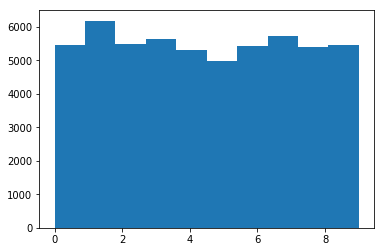

In [0]:
plt.hist(y_train)

In [0]:
# clf.score(X_train_reshaped,y_train)

In [0]:
# clf.score(X_validation_reshaped,y_validation)

In [0]:
# clf.score(X_test_reshaped,y_test)

## Visualize Data

View a sample from the dataset.

You do not need to modify this section.

2


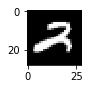

In [0]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(y_train[index])

## Preprocess Data

Shuffle the training data.

You do not need to modify this section.

In [0]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

## Setup TensorFlow
The `EPOCH` and `BATCH_SIZE` values affect the training speed and model accuracy.

You do not need to modify this section.

In [0]:
import tensorflow as tf

EPOCHS = 100
BATCH_SIZE = 512

## TODO: Implement LeNet-5
Implement the [LeNet-5](http://yann.lecun.com/exdb/lenet/) neural network architecture.

This is the only cell you need to edit.
### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since MNIST images are grayscale, C is 1 in this case.

### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported for you.

**Layer 3: Fully Connected.** This should have 120 outputs.

**Activation.** Your choice of activation function.

**Layer 4: Fully Connected.** This should have 84 outputs.

**Activation.** Your choice of activation function.

**Layer 5: Fully Connected (Logits).** This should have 10 outputs.

### Output
Return the result of the 2nd fully connected layer.

In [0]:
connection_probability = tf.Variable(.9999)

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
def xavier_init(size):
    in_dim = size[0]
    xavier_stddev = 1. / tf.sqrt(in_dim / 2.)
    return tf.random_normal(shape=size, stddev=xavier_stddev, seed=1000)

In [0]:
## Define weights of the layer

G_W1 = tf.Variable(np.float32(clf.coefs_[0]))
G_b1 = tf.Variable(np.float32(clf.intercepts_ [0]))

G_W2 =  tf.Variable(np.float32(clf.coefs_[1]))
G_b2 = tf.Variable(np.float32(clf.intercepts_ [1]))

In [0]:
clf.coefs_[1].shape

(300, 100)

In [0]:
from tensorflow.contrib.layers import flatten

def LeNet(x, test_mode = False):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    layer_depth = {
        'layer_1' : 6,
        'layer_2' : 16,
        'layer_3' : 120,
        'layer_f1' : 84
    }


    
    # TODO: Flatten. Input = 5x5x16. Output = 400.
    x_flat = flatten(x)
    fc1 = flatten(x)
    fdense = fc1
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_w = G_W1# tf.Variable(tf.truncated_normal(shape = (X_train.shape[1]*X_train.shape[2],300), mean = mu, stddev = sigma))
    fc1_b = G_b1# tf.Variable(tf.zeros(300))
    fc1 = tf.matmul(fc1,fc1_w) + fc1_b
    
    # TODO: Activation.
    fc1 = tf.nn.relu(fc1)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_w = G_W2# tf.Variable(tf.truncated_normal(shape = (300,100), mean = mu, stddev = sigma))
    fc2_b = G_b2# tf.Variable(tf.zeros(100))
    fc2 = tf.matmul(fc1,fc2_w) + fc2_b
    # TODO: Activation.
    fc2 = tf.nn.relu(fc2)
    
    
    #################
    ##### Inset probability connection from x to conv2
#     fc2p_w = tf.Variable(tf.truncated_normal(shape = [X_train.shape[1]*X_train.shape[2],100], mean = mu, stddev = sigma))
    fc2p_w = tf.Variable(xavier_init([X_train.shape[1]*X_train.shape[2],clf.coefs_[1].shape[1]]))

#     fc2p_b = tf.Variable(tf.zeros(clf.coefs_[1].shape[1]))
    fc2p_b = tf.Variable(xavier_init([clf.coefs_[1].shape[1]]))

    fc2_2nd_input = tf.matmul(x_flat,fc2p_w) + fc2p_b
    fc2_2nd_input = tf.nn.relu(fc2_2nd_input)
    connect2 = tf.logical_and(tf.random.uniform(shape = tf.shape(connection_probability)) < connection_probability, tf.equal(test_mode,False))
    fc2 = tf.cond(connect2,lambda: fc2 + fc2_2nd_input, lambda: fc2 )    
    ################
    
    # TODO: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_w = tf.Variable(tf.truncated_normal(shape = (clf.coefs_[1].shape[1],10), mean = mu , stddev = sigma))
    fc3_b = tf.Variable(tf.zeros(10))
    logits = tf.matmul(fc2, fc3_w) + fc3_b
    return logits

In [0]:
X_train.shape

(55000, 28, 28, 1)

## Features and Labels
Train LeNet to classify [MNIST](http://yann.lecun.com/exdb/mnist/) data.

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

You do not need to modify this section.

In [0]:
with tf.name_scope('Input'):

  x = tf.placeholder(tf.float32, (None, 28, 28, 1), name='X')
  tf.summary.image('input_image', x, max_outputs=5)
  y = tf.placeholder(tf.int32, (None), name = 'Y')
one_hot_y = tf.one_hot(y, 10)
is_testing= tf.placeholder(tf.bool) 

## Training Pipeline
Create a training pipeline that uses the model to classify MNIST data.

You do not need to modify this section.

In [0]:
rate = 0.001
decay_rate = 1.0002;
logits = LeNet(x,is_testing)
with tf.name_scope('Train'):
  cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = one_hot_y)
  loss_operation = tf.reduce_mean(cross_entropy, name='loss')
  tf.summary.scalar('loss', loss_operation)
# optimizer = tf.train.MomentumOptimizer(learning_rate = rate,momentum=.9)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
# tf.train.natural_exp_decay()
training_operation = optimizer.minimize(loss_operation)
new_prob = connection_probability.assign(connection_probability/decay_rate)



Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

You do not need to modify this section.

In [0]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, is_testing: True})
        total_accuracy += (accuracy * len(batch_x))
    tot_acc = total_accuracy / num_examples
    with tf.name_scope('Accuracy'):
      tf.summary.scalar('accuracy', tot_acc)
    return total_accuracy / num_examples

## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

You do not need to modify this section.

In [0]:
import math

In [0]:
def augment(images, labels,
            resize=None, # (width, height) tuple or None
            horizontal_flip=False,
            vertical_flip=False,
            rotate=0, # Maximum rotation angle in degrees
            crop_probability=0, # How often we do crops
            crop_min_percent=0.6, # Minimum linear dimension of a crop
            crop_max_percent=1.,  # Maximum linear dimension of a crop
            mixup=0):  # Mixup coeffecient, see https://arxiv.org/abs/1710.09412.pdf
  if resize is not None:
    images = tf.image.resize_bilinear(images, resize)
  
  # My experiments showed that casting on GPU improves training performance
  if images.dtype != tf.float32:
    images = tf.image.convert_image_dtype(images, dtype=tf.float32)
    images = tf.subtract(images, 0.5)
    images = tf.multiply(images, 2.0)
  labels = tf.to_float(labels)

  with tf.name_scope('augmentation'):
    shp = tf.shape(images)
    batch_size, height, width = shp[0], shp[1], shp[2]
    width = tf.cast(width, tf.float32)
    height = tf.cast(height, tf.float32)

    # The list of affine transformations that our image will go under.
    # Every element is Nx8 tensor, where N is a batch size.
    transforms = []
    identity = tf.constant([1, 0, 0, 0, 1, 0, 0, 0], dtype=tf.float32)
    if horizontal_flip:
      coin = tf.less(tf.random_uniform([batch_size], 0, 1.0), 0.5)
      flip_transform = tf.convert_to_tensor(
          [-1., 0., width, 0., 1., 0., 0., 0.], dtype=tf.float32)
      transforms.append(
          tf.where(coin,
                   tf.tile(tf.expand_dims(flip_transform, 0), [batch_size, 1]),
                   tf.tile(tf.expand_dims(identity, 0), [batch_size, 1])))

    if vertical_flip:
      coin = tf.less(tf.random_uniform([batch_size], 0, 1.0), 0.5)
      flip_transform = tf.convert_to_tensor(
          [1, 0, 0, 0, -1, height, 0, 0], dtype=tf.float32)
      transforms.append(
          tf.where(coin,
                   tf.tile(tf.expand_dims(flip_transform, 0), [batch_size, 1]),
                   tf.tile(tf.expand_dims(identity, 0), [batch_size, 1])))

    if rotate > 0:
      angle_rad = rotate / 180 * math.pi
      angles = tf.random_uniform([batch_size], -angle_rad, angle_rad)
      transforms.append(
          tf.contrib.image.angles_to_projective_transforms(
              angles, height, width))

    if crop_probability > 0:
      crop_pct = tf.random_uniform([batch_size], crop_min_percent,
                                   crop_max_percent)
      left = tf.random_uniform([batch_size], 0, width * (1 - crop_pct))
      top = tf.random_uniform([batch_size], 0, height * (1 - crop_pct))
      crop_transform = tf.stack([
          crop_pct,
          tf.zeros([batch_size]), top,
          tf.zeros([batch_size]), crop_pct, left,
          tf.zeros([batch_size]),
          tf.zeros([batch_size])
      ], 1)

      coin = tf.less(
          tf.random_uniform([batch_size], 0, 1.0), crop_probability)
      transforms.append(
          tf.where(coin, crop_transform,
                   tf.tile(tf.expand_dims(identity, 0), [batch_size, 1])))

    if transforms:
      images = tf.contrib.image.transform(
          images,
          tf.contrib.image.compose_transforms(*transforms),
          interpolation='BILINEAR') # or 'NEAREST'

    def cshift(values): # Circular shift in batch dimension
      return tf.concat([values[-1:, ...], values[:-1, ...]], 0)

    if mixup > 0:
      mixup = 1.0 * mixup # Convert to float, as tf.distributions.Beta requires floats.
      beta = tf.distributions.Beta(mixup, mixup)
      lam = beta.sample(batch_size)
      ll = tf.expand_dims(tf.expand_dims(tf.expand_dims(lam, -1), -1), -1)
      images = ll * images + (1 - ll) * cshift(images)
      labels = lam * labels + (1 - lam) * cshift(labels)

  return images, labels

In [0]:
def augment_data(dataset, dataset_labels, augementation_factor=1, use_random_rotation=True, use_random_shear=True, use_random_shift=True, use_random_zoom=True):
	augmented_image = []
	augmented_image_labels = []

	for num in range (0, dataset.shape[0]):

		for i in range(0, augementation_factor):
			# original image:
			augmented_image.append(dataset[num])
			augmented_image_labels.append(dataset_labels[num])

			if use_random_rotation:
				augmented_image.append(tf.contrib.keras.preprocessing.image.random_rotation(dataset[num], 20, row_axis=0, col_axis=1, channel_axis=2))
				augmented_image_labels.append(dataset_labels[num])

			if use_random_shear:
				augmented_image.append(tf.contrib.keras.preprocessing.image.random_shear(dataset[num], 0.2, row_axis=0, col_axis=1, channel_axis=2))
				augmented_image_labels.append(dataset_labels[num])

			if use_random_shift:
				augmented_image.append(tf.contrib.keras.preprocessing.image.random_shift(dataset[num], 0.2, 0.2, row_axis=0, col_axis=1, channel_axis=2))
				augmented_image_labels.append(dataset_labels[num])

# 			if use_random_zoom:
# 				augmented_image.append(tf.contrib.keras.preprocessing.image.random_zoom(dataset[num], 0.9, row_axis=0, col_axis=1, channel_axis=2))
# 				augmented_image_labels.append(dataset_labels[num])

	return np.array(augmented_image), np.array(augmented_image_labels)

In [0]:
(X_train.shape)

(55000, 28, 28, 1)

In [0]:
merged = tf.summary.merge_all()

In [0]:
EPOCHS = 1000

In [0]:
# mnist.test.images

In [0]:
# Load the test set
x_test = mnist.test.images
y_test = mnist.test.labels

# Initialize the embedding variable with the shape of our desired tensor
tensor_shape = (x_test.shape[0] , logits.get_shape()[1].value) # [test_set , h1] = [10000 , 200]
embedding_var = tf.Variable(tf.zeros(tensor_shape), 
                            name='logits_embedding')
# assign the tensor that we want to visualize to the embedding variable
embedding_assign = embedding_var.assign(logits) 

In [0]:
# EPOCHS = 2

In [0]:
validation_accuracy_track = []
train_accuracy_track = []
connection_probability_track = []

print_every = 10
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    best_accuracy_valid = 0
    train_writer = tf.summary.FileWriter(logs_path, sess.graph)

    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            tr_op,summary_tr  = sess.run([training_operation,merged], feed_dict={x: batch_x, y: batch_y, is_testing : False})
            train_writer.add_summary(summary_tr, i)
            prob = sess.run(new_prob)
#         print(prob)
        if i%print_every == 0:
          tr_accuracy = evaluate(X_train, y_train)
          print("Train Accuracy = {:.5f}".format(tr_accuracy))
          validation_accuracy = evaluate(X_validation, y_validation)
          validation_accuracy_track.append(validation_accuracy)
          train_accuracy_track.append(tr_accuracy)
          connection_probability_track.append(prob)
          print("EPOCH {} ...".format(i+1))
          print("Validation Accuracy = {:.5f}".format(validation_accuracy))
          print(prob)
          print()
          if (validation_accuracy >= best_accuracy_valid):
            best_accuracy_valid = validation_accuracy
            saver.save(sess, './lenet')
        
#     saver.save(sess, './lenet')
    print("Model saved")

Training...

Train Accuracy = 0.97207
EPOCH 1 ...
Validation Accuracy = 0.96880
0.9785342

Train Accuracy = 0.99993
EPOCH 11 ...
Validation Accuracy = 0.98280
0.788445

Train Accuracy = 1.00000
EPOCH 21 ...
Validation Accuracy = 0.98580
0.63528246

Train Accuracy = 1.00000
EPOCH 31 ...
Validation Accuracy = 0.98580
0.5118732

Train Accuracy = 1.00000
EPOCH 41 ...
Validation Accuracy = 0.98600
0.412437

Train Accuracy = 1.00000
EPOCH 51 ...
Validation Accuracy = 0.98580
0.33231702

Train Accuracy = 1.00000
EPOCH 61 ...
Validation Accuracy = 0.98580
0.26776138

Train Accuracy = 1.00000
EPOCH 71 ...
Validation Accuracy = 0.98580
0.21574634

Train Accuracy = 1.00000
EPOCH 81 ...
Validation Accuracy = 0.98560
0.17383538

Train Accuracy = 1.00000
EPOCH 91 ...
Validation Accuracy = 0.98600
0.1400662

Train Accuracy = 1.00000
EPOCH 101 ...
Validation Accuracy = 0.98620
0.11285702

Train Accuracy = 1.00000
EPOCH 111 ...
Validation Accuracy = 0.98600
0.090933554

Train Accuracy = 1.00000
EPOCH 1

In [0]:
best_accuracy_valid

0.9874000003814697

In [0]:
img_w = 28
img_h = 28

In [0]:
from tensorflow.contrib.tensorboard.plugins import projector

# Create a config object to write the configuration parameters
config = projector.ProjectorConfig()

# Add embedding variable
embedding = config.embeddings.add()
embedding.tensor_name = embedding_var.name

# Link this tensor to its metadata file (e.g. labels) -> we will create this file later
embedding.metadata_path = 'metadata.tsv'

# Specify where you find the sprite. -> we will create this image later
embedding.sprite.image_path = 'sprite_images.png'
embedding.sprite.single_image_dim.extend([img_w, img_h])

# Write a projector_config.pbtxt in the logs_path.
# TensorBoard will read this file during startup.
projector.visualize_embeddings(train_writer, config)

In [0]:
# # Run session to evaluate the tensor
# with tf.Session() as sess:
#   x_test_fc1 = sess.run(embedding_assign, feed_dict={x: X_test})

#   # Save the tensor in model.ckpt file
#   saver = tf.train.Saver()
#   saver.save(sess, os.path.join(logs_path, "model.ckpt"), i)

## Evaluate the Model
Once you are completely satisfied with your model, evaluate the performance of the model on the test set.

Be sure to only do this once!

If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.

You do not need to modify this section.

In [0]:
with tf.Session() as sess:
#     saver.restore(sess, tf.train.latest_checkpoint('.'))
    saver.restore(sess, './lenet')
    test_accuracy = evaluate(X_validation, y_validation)
    print("Validation Accuracy = {:.6f}".format(test_accuracy))

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./lenet
Validation Accuracy = 0.987400


In [0]:
with tf.Session() as sess:
#     saver.restore(sess, tf.train.latest_checkpoint('.'))
    saver.restore(sess, './lenet')
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.6f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.984200


In [0]:
# with tf.Session() as sess:
# #     saver.restore(sess, tf.train.latest_checkpoint('.'))
#     saver.restore(sess, './lenet')
#     test_accuracy = evaluate(X_test, y_test)
#     print("Test Accuracy = {:.6f}".format(test_accuracy))

In [0]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
#     saver.restore(sess, './lenet')
    x_test_fc1 = sess.run(embedding_assign, feed_dict={x: X_test,is_testing: True})

    # Save the tensor in model.ckpt file
    saver = tf.train.Saver()
    saver.save(sess, os.path.join(logs_path, "model.ckpt"), i)
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet


NotFoundError: ignored

In [0]:
def write_sprite_image(filename, images):
    """
        Create a sprite image consisting of sample images
        :param filename: name of the file to save on disk
        :param shape: tensor of flattened images
    """

    # Invert grayscale image
    images = 1 - images

    # Calculate number of plot
    n_plots = int(np.ceil(np.sqrt(images.shape[0])))

    # Make the background of sprite image
    sprite_image = np.ones((img_h * n_plots, img_w * n_plots))

    for i in range(n_plots):
        for j in range(n_plots):
            img_idx = i * n_plots + j
            if img_idx < images.shape[0]:
                img = images[img_idx]
                sprite_image[i * img_h:(i + 1) * img_h,
                j * img_w:(j + 1) * img_w] = img

    plt.imsave(filename, sprite_image, cmap='gray')
    print('Sprite image saved in {}'.format(filename))

def write_metadata(filename, labels):
    """
            Create a metadata file image consisting of sample indices and labels
            :param filename: name of the file to save on disk
            :param shape: tensor of labels
    """
    with open(filename, 'w') as f:
        f.write("Index\tLabel\n")
        for index, label in enumerate(labels):
            f.write("{}\t{}\n".format(index, label))

    print('Metadata file saved in {}'.format(filename))
 

In [0]:
y_test.shape

(10000,)

In [0]:
# Reshape images from vector to matrix
x_test_images = np.reshape(np.array(X_test), (-1, img_w, img_h))
# Reshape labels from one-hot-encode to index
x_test_labels = y_test

write_sprite_image(os.path.join(logs_path, 'sprite_images.png'), x_test_images)
write_metadata(os.path.join(logs_path, 'metadata.tsv'), x_test_labels)

Sprite image saved in ./logs/embedding/sprite_images.png
Metadata file saved in ./logs/embedding/metadata.tsv


In [0]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip -o ngrok-stable-linux-amd64.zip
# logdir=logs/embedding/
LOG_DIR = 'logs/embedding/'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)

get_ipython().system_raw('./ngrok http 6006 &')

--2019-04-07 22:31:50--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.73.94.166, 52.45.111.123, 52.4.95.48, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.73.94.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14977695 (14M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  14.28M  7.04MB/s    in 2.0s    

2019-04-07 22:31:53 (7.04 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [14977695/14977695]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [0]:
ngrok_url = !curl -s http://localhost:4040/api/tunnels | python -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"
        
ngrok_url = ngrok_url[0].replace("'", '')
print(ngrok_url)

https://d310ebff.ngrok.io


In [0]:
from IPython.display import IFrame

IFrame(ngrok_url, width=700, height=900)